In [118]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [680]:
# L = np.array(
# 	[[2, -1, 0, -1, 0, 0, 0, 0, 0],
# 	[-1, 3, -1, 0, -1, 0, 0, 0, 0],
# 	[0, -1, 2, 0, 0, -1, 0, 0, 0],
# 	[-1, 0, 0, 3, -1, 0, -1, 0, 0],
# 	[0, -1, 0, -1, 4, -1, 0, -1, 0],
# 	[0, 0, -1, 0, -1, 3, 0, 0, -1],
# 	[0, 0, 0, -1, 0, 0, 2, -1, 0],
# 	[0, 0, 0, 0, -1, 0, -1, 3, -1],
# 	[0, 0, 0, 0, 0, -1, 0, -1, 2]])

L = np.array([
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ])

def load_graph(L):
    A = np.copy(L)
    for i in range(len(A)):
        A[i][i] = 0
    A = -A
#     print(A)
    G = nx.from_numpy_matrix(A)
    return G

def find_least_connected(G):
#     diagonal = np.array([G.degree(i) for i in G.nodes()])
    sorted_nodes = sorted(G.nodes(), key=lambda x : G.degree(x))
    least_k = [node for node in sorted_nodes if G.degree(node) == G.degree(sorted_nodes[0])]
#     print([G.degree(node) for node in sorted_nodes])
    return least_k, sorted_nodes

# def contract(G, fixed_points=[]):
#     most_k = find_most_connected(G, 5)
#     path = nx.astar_path(G, most_k[0], most_k[1])
#     for i in range(1, len(path)):
#         edge_to_contract = (path[0], path[i])
#         G = nx.contracted_edge(G, edge_to_contract)
#     return G

def contract(G, uf, node_map, k, update_uf=True, fixed_points=[]):
    least_k, sorted_nodes = find_least_connected(G)
    index = np.random.choice(len(least_k))
    node = least_k[index]
    escape_condition = all([sorted_nodes.index(neighbor) >= len(sorted_nodes) - k for neighbor in G.neighbors(node)])
    for neighbor in G.neighbors(node):
#         print sorted_nodes.index(neighbor)
        if neighbor not in fixed_points and (sorted_nodes.index(neighbor) < len(sorted_nodes) - k or escape_condition):
            if update_uf:
                uf.union(node_map[node], node_map[neighbor])
            edge_to_contract = (node, neighbor)
            if G.degree(node) == 1:
                G = nx.contracted_nodes(G, node, neighbor, self_loops=False)
            else:
                G = nx.contracted_nodes(G, node, neighbor)
    return G

def recursive_contract(G, n, k, uf, node_map, image=False, fixed_points=[]):
    if image:
            nx.draw_networkx(G)
            plt.show()
    if n == 0:
        return G
    else:   
        num_vertices = len(contract(G, uf, node_map, k, update_uf=False, fixed_points=fixed_points).nodes())
        if num_vertices < len(fixed_points) + k:
            return G
        else:
            return recursive_contract(contract(G, uf, node_map, k, fixed_points=fixed_points), n-1, k, uf, node_map, image, fixed_points)
        
def iterative_contract(G, n, k, uf, node_map, image=False, fixed_points=[]):
    for i in range(n):
        if i % 10 == 0:
            print i,
        if image:
            nx.draw_networkx(G)
            plt.show()
        
        num_vertices = len(contract(G, uf, node_map, k, update_uf=False, fixed_points=fixed_points).nodes())
        if num_vertices < len(fixed_points) + k:
            break
        else:
            G = contract(G, uf, node_map, k, fixed_points=fixed_points)
    
    return G

In [690]:
# G = load_graph(L)
# G = nx.balanced_tree(2,3)
# G = nx.barbell_graph(5,5)
d = 25
k = 10
G = nx.grid_2d_graph(d,d)
node_map = {G.nodes()[i] : i for i in range(len(G.nodes()))}
uf = UnionFind(len(G.nodes()))

# nx.draw(G)
# plt.show()

In [691]:
new_G = iterative_contract(G, 500, k, uf, node_map, image=False, fixed_points=[])

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490


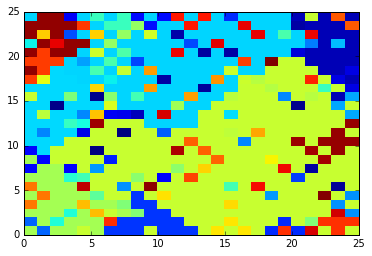

In [558]:
B = np.zeros((d,d))
for node in node_map:
    B[node[0], node[1]] = uf._id[node_map[node]]
    
# A = np.array(uf._id)
# B = np.reshape(A, (10,10))
plt.pcolor(B)
plt.show()

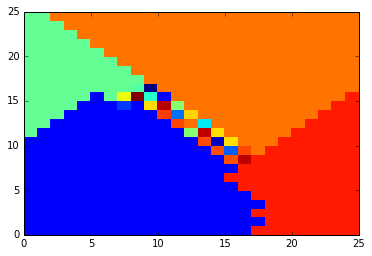

In [577]:
B = np.zeros((d,d))
for node in node_map:
    B[node[0], node[1]] = uf._root(node_map[node])
    
# A = np.array(uf._id)
# B = np.reshape(A, (10,10))
plt.pcolor(B)
plt.show()

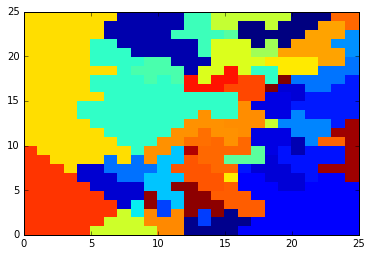

In [689]:
B = np.zeros((d,d))
for node in node_map:
    B[node[0], node[1]] = uf._root(node_map[node])
    
# A = np.array(uf._id)
# B = np.reshape(A, (10,10))
plt.pcolor(B)
plt.show()

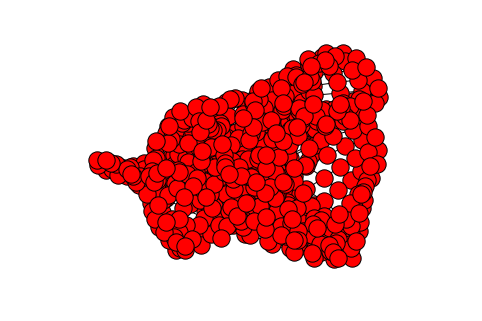

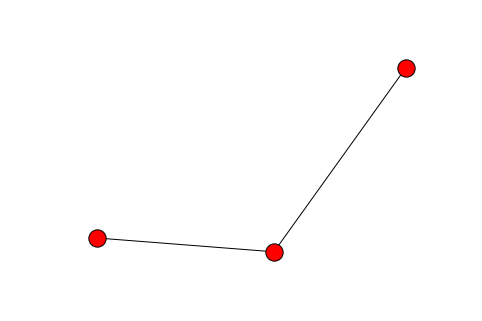

In [563]:
nx.draw(G)
plt.show()
nx.draw(new_G)
plt.show()

In [564]:
uf._id

[361,
 193,
 177,
 193,
 193,
 193,
 193,
 193,
 434,
 193,
 373,
 193,
 193,
 377,
 9,
 193,
 193,
 193,
 531,
 385,
 193,
 193,
 193,
 193,
 296,
 193,
 193,
 193,
 100,
 193,
 193,
 205,
 193,
 193,
 193,
 404,
 193,
 65,
 193,
 193,
 193,
 383,
 504,
 193,
 193,
 434,
 434,
 434,
 434,
 434,
 417,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 193,
 231,
 193,
 9,
 193,
 193,
 193,
 193,
 193,
 193,
 434,
 602,
 143,
 342,
 436,
 342,
 383,
 9,
 193,
 532,
 193,
 193,
 97,
 602,
 193,
 193,
 9,
 193,
 111,
 193,
 193,
 20,
 193,
 193,
 193,
 193,
 193,
 602,
 193,
 193,
 426,
 434,
 193,
 434,
 9,
 193,
 193,
 383,
 472,
 193,
 193,
 112,
 193,
 193,
 479,
 437,
 480,
 386,
 9,
 193,
 193,
 484,
 193,
 193,
 194,
 193,
 193,
 494,
 602,
 193,
 186,
 305,
 193,
 9,
 193,
 500,
 193,
 505,
 193,
 193,
 193,
 418,
 434,
 434,
 434,
 512,
 434,
 419,
 193,
 324,
 193,
 193,
 193,
 434,
 193,
 602,
 193,
 426,
 602,
 9,
 193,
 9,
 193,
 193,
 9,
 434,
 602,
 434,
 530,
 43

In [428]:
new_G.nodes()

[(7, 3),
 (16, 9),
 (19, 4),
 (17, 20),
 (20, 7),
 (18, 19),
 (21, 6),
 (8, 5),
 (9, 0),
 (10, 7),
 (11, 22),
 (24, 14),
 (14, 1),
 (12, 17),
 (15, 4),
 (13, 20),
 (3, 2),
 (4, 5),
 (16, 0),
 (19, 13),
 (17, 13),
 (20, 14),
 (18, 10),
 (21, 15),
 (8, 12),
 (22, 12),
 (9, 9),
 (10, 14),
 (8, 18),
 (11, 15),
 (9, 19),
 (14, 8),
 (12, 8),
 (15, 13),
 (13, 13),
 (3, 11),
 (1, 15),
 (4, 12),
 (2, 12),
 (5, 1),
 (3, 17),
 (16, 7),
 (6, 14),
 (19, 18),
 (17, 6),
 (7, 15),
 (20, 21),
 (18, 5),
 (21, 8),
 (22, 7),
 (23, 6),
 (10, 9),
 (11, 4),
 (9, 20),
 (14, 19),
 (12, 7),
 (10, 19),
 (15, 10),
 (13, 6),
 (0, 5),
 (4, 11),
 (2, 7),
 (5, 10),
 (6, 1),
 (4, 17),
 (7, 4),
 (16, 20),
 (19, 1),
 (17, 17),
 (18, 22),
 (15, 19),
 (11, 19),
 (24, 9),
 (12, 20),
 (16, 11),
 (6, 18),
 (19, 6),
 (17, 10),
 (20, 1),
 (18, 17),
 (21, 4),
 (8, 7),
 (22, 11),
 (9, 6),
 (10, 5),
 (11, 8),
 (14, 7),
 (12, 19),
 (15, 6),
 (13, 18),
 (0, 9),
 (3, 4),
 (4, 7),
 (5, 6),
 (16, 2),
 (19, 15),
 (17, 3),
 (7, 16),
 (2

In [297]:
class UnionFind:
    """Weighted quick-union with path compression.
    The original Java implementation is introduced at
    https://www.cs.princeton.edu/~rs/AlgsDS07/01UnionFind.pdf
    >>> uf = UnionFind(10)
    >>> for (p, q) in [(3, 4), (4, 9), (8, 0), (2, 3), (5, 6), (5, 9),
    ...                (7, 3), (4, 8), (6, 1)]:
    ...     uf.union(p, q)
    >>> uf._id
    [8, 3, 3, 3, 3, 3, 3, 3, 3, 3]
    >>> uf.find(0, 1)
    True
    >>> uf._id
    [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
    """

    def __init__(self, n):
        self._id = list(range(n))
        self._sz = [1] * n

    def _root(self, i):
        j = i
        while (j != self._id[j]):
            self._id[j] = self._id[self._id[j]]
            j = self._id[j]
        return j

    def find(self, p, q):
        return self._root(p) == self._root(q)
    
    def union(self, p, q):
        i = self._root(p)
        j = self._root(q)
        if i == j:
            return
        if (self._sz[i] < self._sz[j]):
            self._id[i] = j
            self._sz[j] += self._sz[i]
        else:
            self._id[j] = i
            self._sz[i] += self._sz[j]